# PROJETO IMC

Esse projeto tem como objetivo criar uma calculadora para calcular o índice de massa corpórea e fazer uma análise utilizando modelos de machine learning para verificar se o imc é um bom preditor para classificar um diagnóstico de diabetes.

## CALCULADORA DE IMC

O IMC é um índice, criado na década de 30 por um estatístico belga, com o objetivo de medir de forma quantitativa aspéctos da saúde de um indivíduo.

Em geral, pessoas com um índice de massa corporal mais alto têm mais gordura corporal, e é possível associá-lo às taxas de obesidade. Também é possível associar IMCs muito baixos e muito altos com uma maior taxa de mortalidade precoce.

É importante salientar que a precisão e a utilidade do IMC envolvem muitos outros fatores, pois o índice não é capaz de calcular, por exemplo, qual porcentagem do peso de uma pessoa é composto por gordura, músculo ou osso. Por exemplo, os fisiculturistas tendem a ter um IMC alto, mas com pouca gordura corporal. 

Então o IMC é apenas **um** indicador que pode ser útil para avaliar a saúde de indivíduo se utilizados em conjunto com outros indicadores e exames.

In [100]:
# Lendo a altura e o peso do indivíduo
altura = float(input('Altura em metros: '))
kg = float(input('Peso em kg: '))

# Verificando se os dados são válidos
# altura e peso devem ser maiores que zero

while altura <=0 or kg <=0:
  print('Altura ou Peso Inválido. Por favor digite novamente.')
  altura = float(input('Altura em metros: '))
  kg = float(input('Peso em kg: '))

imc = kg/pow(altura, 2)

# Intervalo de peso considerado normal
lim_inf = 18.5*pow(altura, 2)
lim_sup = 24.9*pow(altura, 2)

def limites():
  print('Para a sua altura o seu peso deve está entre: {:.2f} kg e {:.2f} kg'.format(lim_inf, lim_sup))

# Resultados
print('\nSeu IMC é igual a: {:.2f}'.format(imc))

if imc < 18.5:
  print('Você está abaixo do peso.')
  limites()

elif imc >= 18.5 and imc <=24.9:
  print('O seu peso é considerado normal.')
  limites()

elif imc > 24.9 and imc < 29.9:
  print('Você está com excesso de peso.')
  limites()

else:
  print('Com esse imc você já considerada uma pessoa obesa.')
  limites()

Altura em metros: 1.76
Peso em kg: 90

Seu IMC é igual a: 29.05
Você está com excesso de peso.
Para a sua altura o seu peso deve está entre: 57.31 kg e 77.13 kg


## APLICAÇÃO DE MODELOS DE MACHINE LEARNING

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos. O objetivo aqui será vericar se o IMC é uma boa varável para prever um diagnóstico de diabetes.

Algumas restrições foram colocadas na seleção dessa amostra de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade, descendentes dos índios Pima.

#### Pacotes e leitura da base de dados

In [101]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/Portfólio/diabetes.csv')

#### Visão Geral da Base de Dados

Na base de dados existem 9 variáveis:

* Pregnacies: número de gravides
* Glucose: Glicose no sangue
* BloodPressure: Pressão sanguinea
* Skin Thicknes: 
* Insulin:
* BMI: Índice de Massa Corpórea (IMC)
* DiabetesPedigreeFunction:
* Age: Idade da mulher
* Outcome: Diagnóstico de diabetes (1 positivo e 0 negativo)

In [102]:
# Primeiras observações
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
# Algumas estatísticas descritivas
round(df.describe(), 4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.349
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.477
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2438,24.0000,0.000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.000


#### IMC vs Diabetes

Antes de entrarmos de fato na construção e ajuste dos modelos de machine learning, algumas técnicas descritivas como tabelas e gráficos podem nos dá algum indício preliminar da relação entre o índice de massa corpórea e o diagnóstico de diabetes.

O códico abaixo gera o imc médio para mulheres que não tiveram um diagnóstico de diabetes e para as que tiveram separadamente. A idéia aqui é a seguinte, se o imc de fato não tiver um relação com o diagnóstico, então as médias devem ser muito próximas.

In [104]:
df.groupby(['Outcome']).mean()['BMI']

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

O código abaixo mostra a diferença percentual entre as médias. Vemos que a média do imc das mulheres com diagnóstico é 15.97% maior.

In [105]:
# Diverença percentual das médias
aux = df.groupby(['Outcome']).mean()['BMI']
100*round((aux[1] - aux[0])/aux[0], 4)

15.97

Uma maneira de verificar os resultados acima de uma forma gráfica é através de gráficos com Box-plot ou histograma. Separando a amostra em duas sub-amostra e plotando para cada sub-amostra um box-plot ou um histograma e comparando os dois.

In [106]:
px.box(df, y = 'BMI', x = 'Outcome')

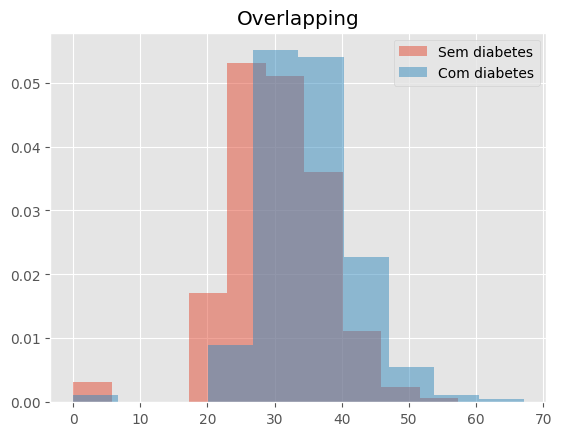

In [107]:
plt.style.use('ggplot')

plt.hist(df[df['Outcome'] == 0]['BMI'], alpha = 0.5, label = 'Sem diabetes', density=True)  
plt.hist(df[df['Outcome'] == 1]['BMI'], alpha = 0.5, label = 'Com diabetes', density=True)
  
plt.legend(loc='upper right') 
plt.title('Overlapping') 
plt.show()

### Modelo de Regresão Linear

A estratégia que vou utilizar aqui vai ser a seguinte: eu vou ajustar dois modelos de regressão linear, um com a variáveis resposta o diagnóstico com diabetes com apenas o IMC como variável explicativa, e o outro modelo vou colocar todas as outra variáveis da base junto com o IMC como variáveis explicativas.

Ajustado os modelos vou fazer um teste de hipótese estatístico para verificar se IMC é uma veriável importante para o modelo.

#### Modelo 1: $Outcome = \beta_0 + \beta_1 BMI + u$

Teste de Hipótese:
* $H_0: \beta_1 = 0$
* $H_1: \beta_1 \neq 0$

In [108]:
# Estimação dos Parâmetros

X = df['BMI'].values.reshape(-1,1)
y = df['Outcome'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

# Resultados

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     71.77
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.23e-16
Time:                        18:20:32   Log-Likelihood:                -486.27
No. Observations:                 768   AIC:                             976.5
Df Residuals:                     766   BIC:                             985.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2175      0.069     -3.159      0.0

Pelos os resultado acima temos que o p-valor do teste de hipótese é aproximadamente zero, o que siginifica que a variável IMC é significativa para modelo a nível de significância de 1%.

#### Modelo 2: $Outcome = \beta_0 + \beta_1 BMI + \beta_2Pregnancies + \beta_3Glucose + \beta_4BloodPressure + \beta_5Skin Thicknes + \beta_6DiabetesPedigreeFunction + \beta_7Age + \beta_8Insulin + u$

Teste de Hipótese:
* $H_0: \beta_1 = 0$
* $H_1: \beta_1 \neq 0$

In [109]:
# Estimação dos Parâmetros

X = df[['BMI', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'Insulin']]
y = df['Outcome'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

# Resultados

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           7.36e-55
Time:                        18:20:32   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Pelos os resultados acima temos que o p-valor do teste de hipótese para a variável IMC/BMI é aproximadamente zero, o que siginifica que a variável IMC é significativa para modelo a nível de significância de 1%. Em relação a outras co-variáveis, a grande maioria são significantes a 1% com a exceção de 3. A variável Age é significativa mas a um nível de significancia de 10%, e as variáveis SkinThickness e Insulin não são estatísticamente significantes.

**DISCLAIMER:** COMO A NOSSA VARIÁVEL RESPOSTA É CATEGÓRICA O MODELO DE REGRESSÃO LINEAR NÃO É O MAIS ADEQUADO. NOTE QUE O COEFICIENTE DE DETERMINAÇÃO, NOS DOIS MODELOS, É BAIXO. ISSO INDICA UMA FALTA DE AJUSTE OU UM AJUSTE MUITO POBRE DO MODELO AO DADOS. ESSA ANÁLISE É PARA FINS DIDÁTICOS.

### Modelo de Regressão Logística

A estratégia que vou utilizar será a mesma da regressão linear: vou ajustar dois modelos, um com a variáveis resposta o diagnóstico com diabetes com apenas o IMC como variável explicativa e o outro modelo vou colocar todas as outra variáveis da base junto com o IMC como variáveis explicativas.

Ajustado os modelos vou fazer um teste de hipótese estatístico para verificar se IMC é uma veriável importante para o modelo.

#### Modelo 1: $logit(p) = ln\left(\dfrac{p}{1-p}\right) = \beta_0 + \beta_1 BMI$, onde $p = P(Outcome = 1)$

Teste de Hipótese:
* $H_0: \beta_1 = 0$
* $H_1: \beta_1 \neq 0$

In [132]:
# Estimação dos Parâmetros

X = df['BMI'].values.reshape(-1,1)
y = df['Outcome'].values.reshape(-1,1).ravel()

reg = LogisticRegression()
reg.fit(X, y)

# Resultados

X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.599423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                 0.07325
Time:                        18:49:31   Log-Likelihood:                -460.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.457e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6864      0.409     -9.014      0.000      -4.488      -2.885
x1             0.0935      0.

Os resultados acima mostra um p-valor do teste de hipótese é aproximadamente zero, o que siginifica que a variável IMC é significativa para modelo a nível de significância de 1%.

#### Modelo 2: $logit(p) = ln\left(\dfrac{p}{1-p}\right) = \beta_0 + \beta_1 BMI + \beta_2Pregnancies + \beta_3Glucose + \beta_4BloodPressure + \beta_5Skin Thicknes + \beta_6DiabetesPedigreeFunction + \beta_7Age + \beta_8Insulin$.

Onde $p = P(Outcome = 1)$

Teste de Hipótese:
* $H_0: \beta_1 = 0$
* $H_1: \beta_1 \neq 0$

In [131]:
y = df[['Outcome']].values.reshape(-1,1).ravel()

X = df
X = X.drop(['Outcome'], axis = 'columns')
X = X[['BMI', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'Insulin']]

# Resultados

X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.2718
Time:                        18:45:24   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

Pelos os resultados acima temos que o p-valor do teste de hipótese para a variável IMC/BMI é aproximadamente zero, o que siginifica que a variável IMC é significativa para modelo a nível de significância de 1%. Em relação a outras co-variáveis, a grande maioria são significantes a 1% com a exceção de 3 que não deram significativas. A variável Age, SkinThickness e Insulin não são estatísticamente significantes.